# About 

Description:

@brief This notebook defines dataset exploratory operations for visualizing, understanding, 
and computing statistics for the dataset below. 

Dataset: https://genesys-lab.org/oracle, follows SigMF format https://github.com/sigmf/SigMF 

    - Note, dtype for IQ is dtype=np.complex128 (ignore the precision in the metadata files, that is wrong, per the website above)

How to use: simply use the "Run All" button in Jupyter to execute all cells as once.
Note, in the first code cell below, you may need to update the path to your local 
location of the dataset.

@author: Greg Zdor (gzdor@icloud.com)

@date Date_Of_Creation: 3/13/2023 

@date Last_Modification 3/15/2023 

No Copyright - use at will

In [1]:
# Built-in library imports 
import os 
import sys 
import json
import time
import copy
from datetime import datetime

# Data science & ML imports 
import random
import numpy as np 
import matplotlib.pyplot as plt 

try: 
    import pywt 
except: 
    !pip install PyWavelets
    import pywt 

# Add local source files to namespace 
sys.path.append('../../')

# Local imports 
from pkgs.utils.file_utils import *
from pkgs.utils.plotting_utils import * 

now = datetime.now()
print(f'\n\nLast time this cell was run was \n\n  {now.strftime("%d/%m/%Y %H:%M:%S")}\n\n')



Last time this cell was run was 

  15/03/2023 21:21:27




In [2]:
# View python and conda info 
try: 
    !conda env list
    !python3 -V 
except: 
    pass 

!pip install --upgrade pip

# conda environments:
#
base                     /home/gregzdor/miniconda3
cs7643-a1                /home/gregzdor/miniconda3/envs/cs7643-a1
cs7643-a2                /home/gregzdor/miniconda3/envs/cs7643-a2
cs7643-a3                /home/gregzdor/miniconda3/envs/cs7643-a3
cs7643-a4-nlp-sequence     /home/gregzdor/miniconda3/envs/cs7643-a4-nlp-sequence
rf-fingerprinting-proj-cs7643  *  /home/gregzdor/miniconda3/envs/rf-fingerprinting-proj-cs7643
                         /mnt/c/Users/gregt/Miniconda_Install

Python 3.10.9


### Define path to dataset

User, update according to your local path

In [3]:
# Dataset path 

dataset_path = r'/mnt/u/ga_tech/cs7643_DL_rf_fingerprint_final_project/'

demod_data_folders = ['neu_m044q523j', 'KRI-16IQImbalances-DemodulatedData']

raw_data_folders = ['neu_m044q5210', 'KRI-16Devices-RawData']


raw_data_path = os.path.join(dataset_path, raw_data_folders[0], raw_data_folders[1])
demod_data_path = os.path.join(dataset_path, demod_data_folders[0], demod_data_folders[1])
print(f'\nProcessed data @: \n {demod_data_path}\n')
print(f'\nRaw data @: \n {raw_data_path}\n')



Processed data @: 
 /mnt/u/ga_tech/cs7643_DL_rf_fingerprint_final_project/neu_m044q523j/KRI-16IQImbalances-DemodulatedData


Raw data @: 
 /mnt/u/ga_tech/cs7643_DL_rf_fingerprint_final_project/neu_m044q5210/KRI-16Devices-RawData



### Get all data files and their corresponding metadata files paths

In [4]:
files = {
    'raw'         : {},
    'processed'   : {}
}
paths = [demod_data_path, raw_data_path]

for idx, root_path in enumerate(paths):
    for path, _, filenames in os.walk(root_path): 
        for file in filenames: 
            
            just_filename, _ = os.path.splitext(file)
            just_filename = os.path.join(root_path, path, just_filename)
            
            if idx > 0: 
                files['raw'][just_filename] = just_filename
            else: 
                files['processed'][just_filename] = just_filename

### Load example raw data and metadata file

In [5]:
# Get a random file 
file = random.choice(list(files['raw'].keys()))
data_file = file + ".sigmf-data"
meta_file = file + ".sigmf-meta"

raw_output = load_sigmf_iq_meta(data_file, meta_file)
print(f'\nLoaded {data_file} and metadata, data file size is {os.path.getsize(data_file)/(1024*1024)} MB')


Loaded /mnt/u/ga_tech/cs7643_DL_rf_fingerprint_final_project/neu_m044q5210/KRI-16Devices-RawData/2ft/WiFi_air_X310_3123D78_2ft_run1.sigmf-data and metadata, data file size is 305.2734375 MB



Create plots, using fc = 2.45 GHz and fs = 5.0 MHz



/mnt/c/Users/gregt/Desktop/academic_life/ga_tech_cs7643_deep_learning/Radio_Frequency_Fingerprinting_802.11/src/tools/explore_data/../../pkgs/utils/plotting_utils.py:108: RuntimeWarning: divide by zero encountered in log10
  x_power_db = 20*np.log10(np.abs(iq))




Creating time domain plot.




/home/gregzdor/miniconda3/envs/rf-fingerprinting-proj-cs7643/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


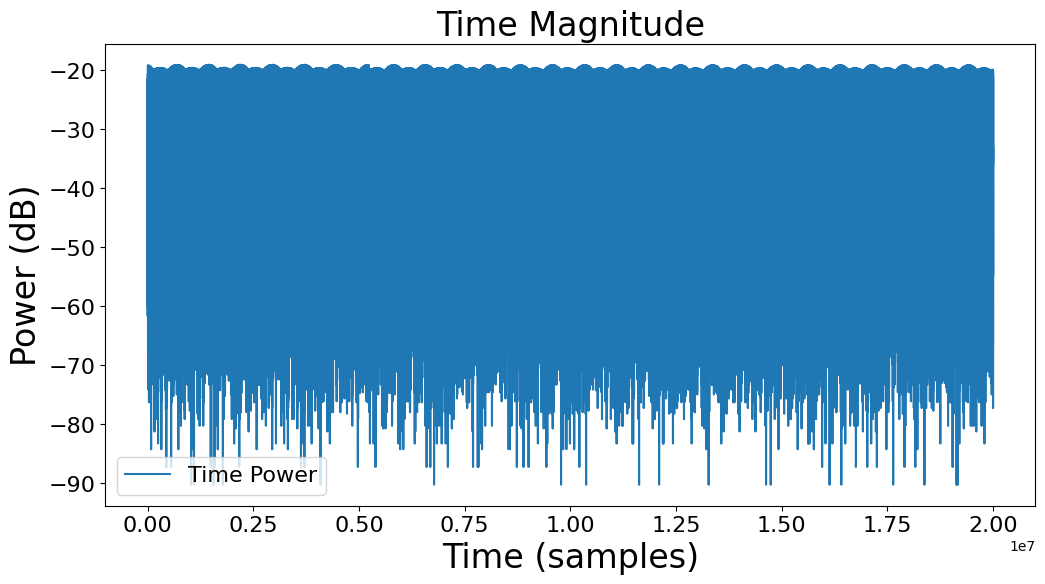



Creating frequency domain plot.




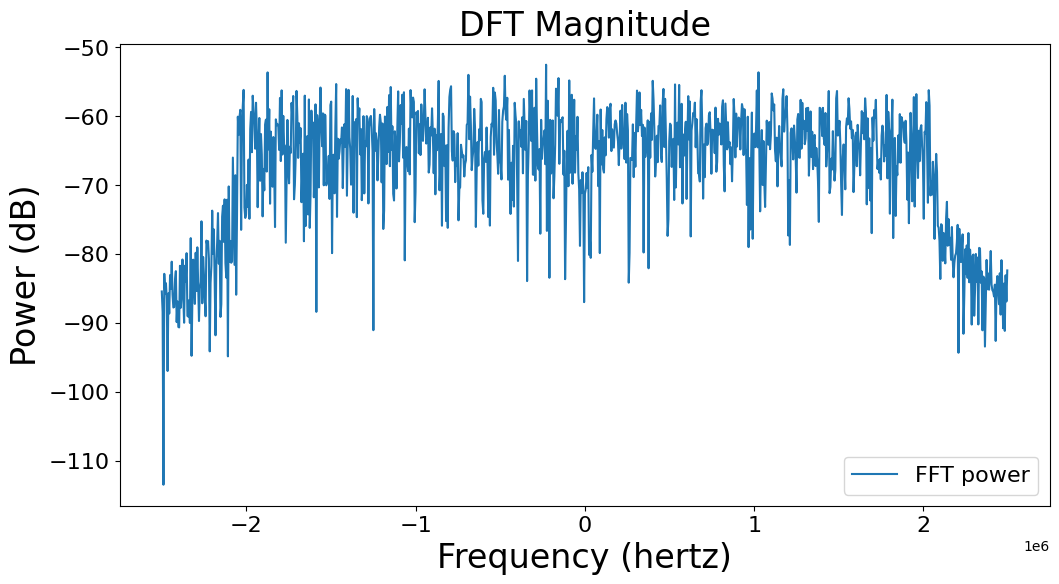



Creating spectrogram plot.




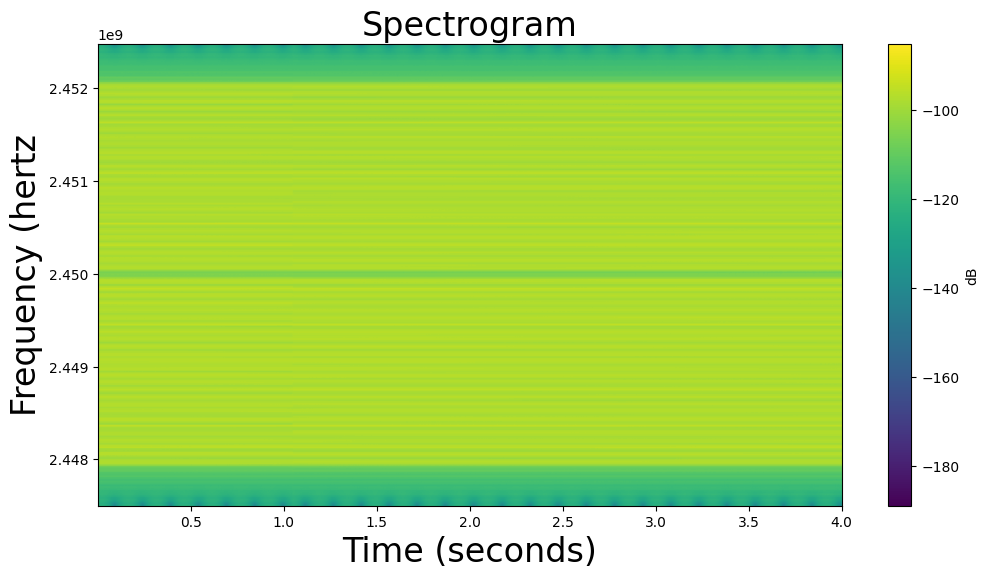



Creating constellation plot.




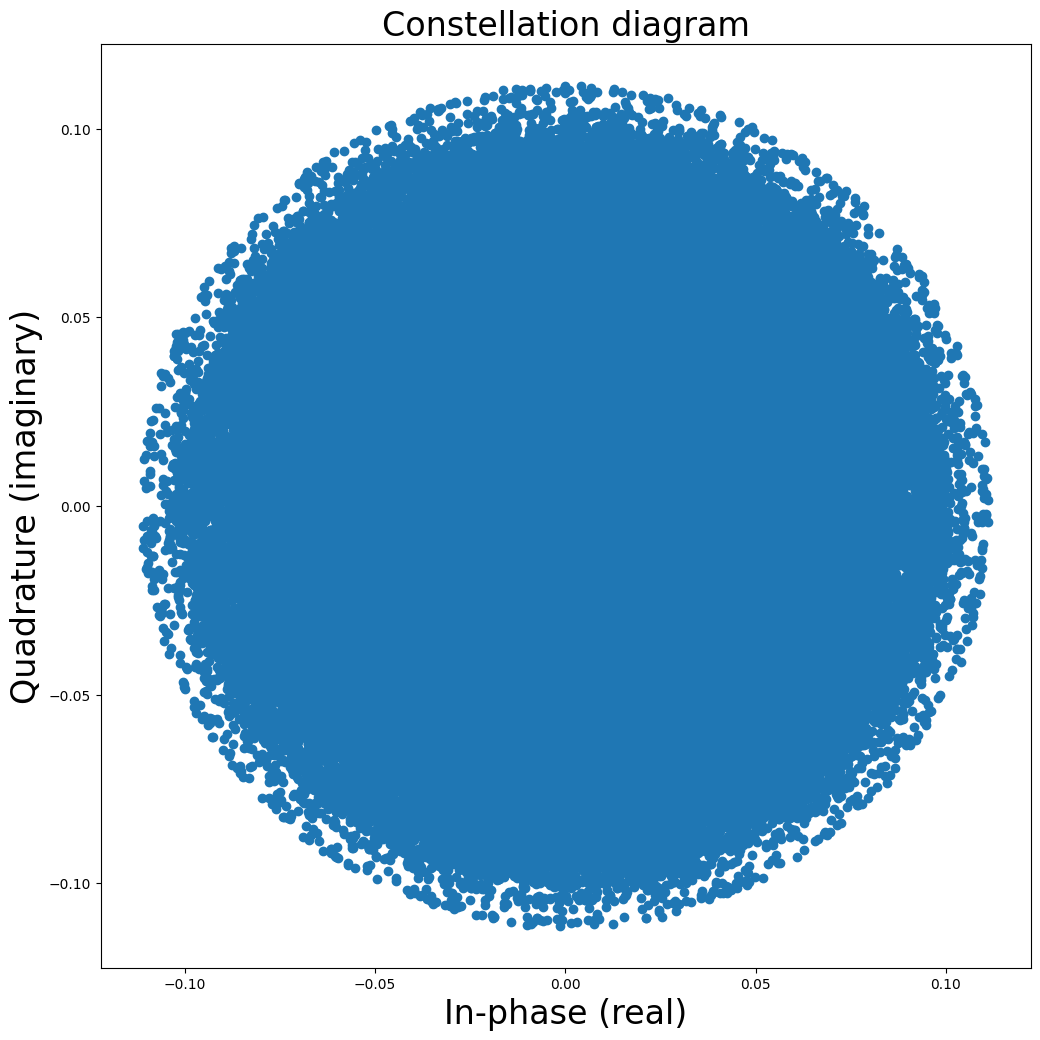

In [6]:
# Plot data 
iq = raw_output['samples']
raw_metadata = raw_output['metadata']

fc = raw_metadata['_metadata']['captures'][0]['frequency']
fs = raw_metadata['_metadata']['global']['core:sample_rate']
fft_size = 1024

print(f'\nCreate plots, using fc = {fc/1e9} GHz and fs = {fs/1e6} MHz\n')

# Time plot 
create_time_domain_plot(iq)

# DFT (discrete Fourier transform) plot 
create_df(iq, fft_size, fs)

# Spectrogram plot 
create_spectrogram(iq, fs, fc)

# Create constellation plot 
create_constellation_plot(iq)

### Load example processed data and metadata file 

In [7]:
# Get a random file 
file = random.choice(list(files['processed'].keys()))
data_file = file + ".sigmf-data"
meta_file = file + ".sigmf-meta"

processed_output = load_sigmf_iq_meta(data_file, meta_file)
print(f'\nLoaded {data_file} and metadata, data file size is {os.path.getsize(data_file)/(1024*1024)} MB')


Loaded /mnt/u/ga_tech/cs7643_DL_rf_fingerprint_final_project/neu_m044q523j/KRI-16IQImbalances-DemodulatedData/Demod_WiFi_cable_X310_3123D76_IQ#32_run1.sigmf-data and metadata, data file size is 42.030029296875 MB



Create plots, using fc = 2.45 GHz and fs = 5.0 MHz



Creating time domain plot.




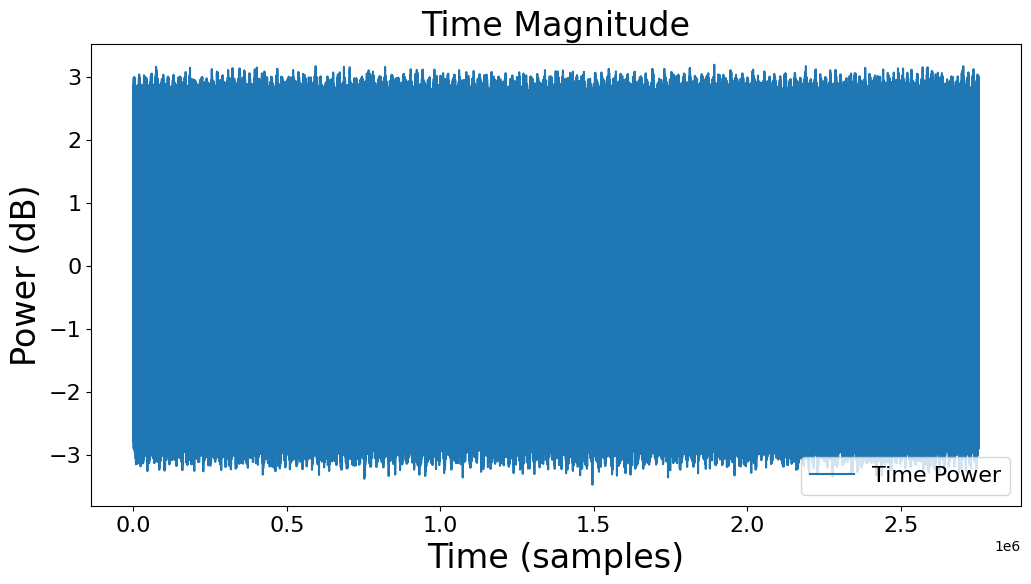



Creating frequency domain plot.




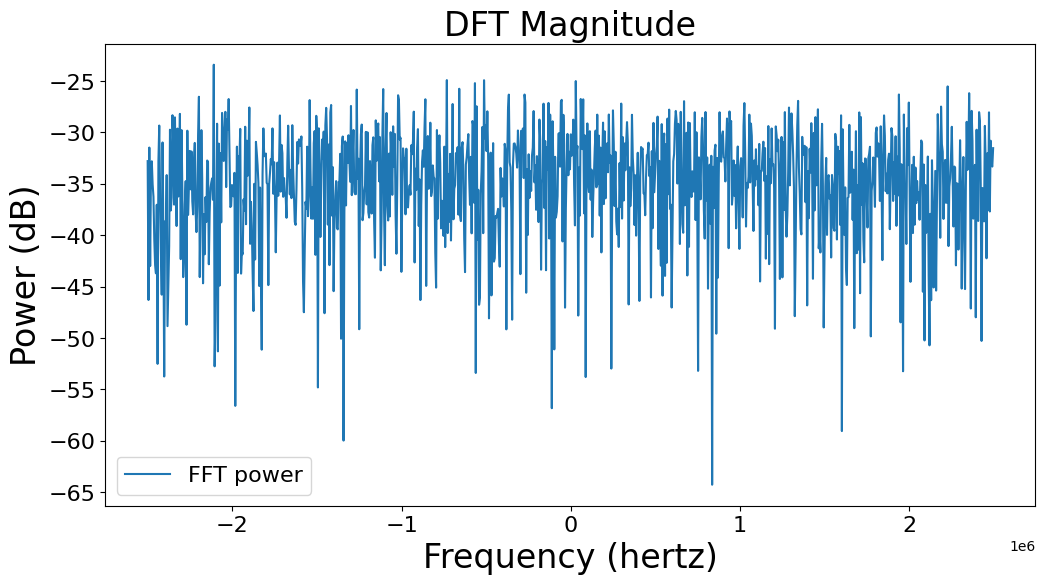



Creating spectrogram plot.




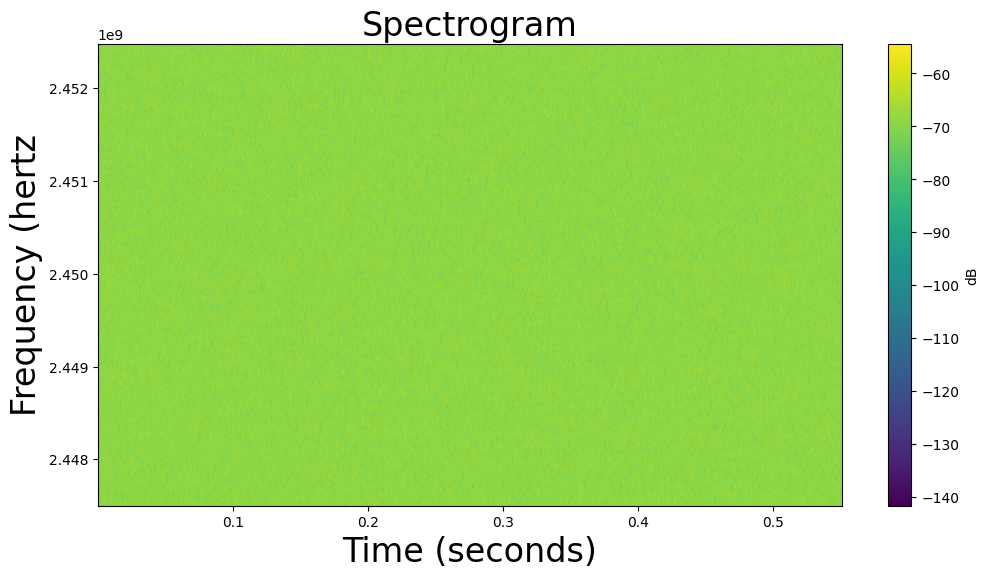



Creating constellation plot.




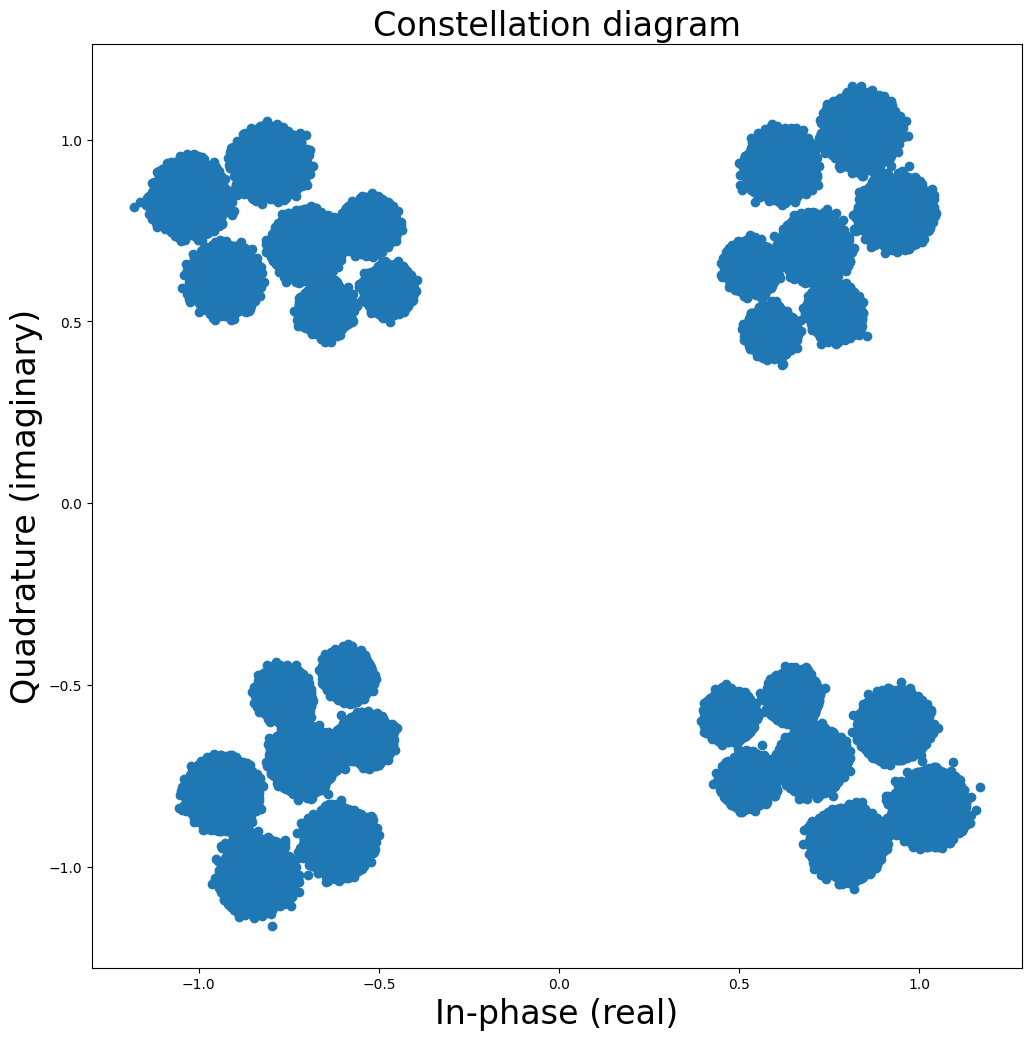

In [8]:
# Plot data 
iq = processed_output['samples']
processed_metadata = processed_output['metadata']

fc = processed_metadata['_metadata']['captures'][0]['frequency']
fs = processed_metadata['_metadata']['global']['core:sample_rate']
fft_size = 1024

print(f'\nCreate plots, using fc = {fc/1e9} GHz and fs = {fs/1e6} MHz\n')

# Time plot 
create_time_domain_plot(iq)

# DFT (discrete Fourier transform) plot 
create_df(iq, fft_size, fs)

# Spectrogram plot 
create_spectrogram(iq, fs, fc)

# Create constellation plot 
create_constellation_plot(iq) 

### View metadata contents

In [9]:
processed_metadata

{'data_file': '/media/kunal/GENESYS-HD/INFOCOM2019-ORACLE-Dataset/SigMF-Dataset/KRI-16IQImbalances-DemodulatedData/Demod_WiFi_cable_X310_3123D76_IQ#32_run1.sigmf-data',
 '_metadata': {'captures': [{'core:sample_start': 0,
    'core:time': '2019-10-01T23:41:12.979578Z',
    'frequency': 2450000000}],
  'global': {'core:sha512': 'c1c9d06f5c59dd6e77edf038769f221b8ff73910f74c7268aa0d4b1ee85d47a2e3c2a02ba7056f30242e2b106dee0284ff6924140d46e3af50723af54d39d900',
   'core:version': '0.02',
   'core:author': 'Kunal Sankhe',
   'core:sample_rate': 5000000.0,
   'core:description': 'SigMF IQ samples recording of demodulated data derived from over-the-cable WiFi transmissions collected by a fixed USRP B210 as a receiver. The transmitter emitted IEEE 802.11a standards compliant frames generated via a MATLAB WLAN System toolbox. Using UHD software, a controlled level of IQ imbalance is introduced at the runtime such that the demodulated symbols acquire unique characteristics.',
   'core:datatype': 

### Compute dataset statistics 

    - total number of samples per class 
    - distribution of number of samples across classes 
    - SNR ranges represented, distribution of SNRs 
    - total dataset size in gigabytes 
    

In [10]:
# Define histogram plotting utility

In [11]:
# Calculate number of samples per class 

# Calculate total dataset size 